In [128]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from scipy.stats import sem

In [2]:
# import clinical trial data
ctrial_file = "clinicaltrial_data.csv"
ctrial_path = os.path.join('raw_data', ctrial_file)

ctrial_df = pd.read_csv(ctrial_path)
ctrial_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# import mouse drug data
mouse_file = "mouse_drug_data.csv"
mouse_path = os.path.join('raw_data', mouse_file)

mouse_df = pd.read_csv(mouse_path)
mouse_df.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
# merge the mouse and clinical trial data
combined = pd.merge(mouse_df, ctrial_df, on ="Mouse ID")

combined.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [139]:
# Limit the data based on tumor volume
t_volume_df = combined[["Timepoint", "Drug", "Tumor Volume (mm3)"]]

# create a group by drug and timepoint
t_vol_grp = t_volume_df.groupby(["Drug", "Timepoint"])

# create a volume for data framing
t_vol = t_vol_grp["Tumor Volume (mm3)"].mean()

# create the data frame for reorginzing
t_vol_df = pd.DataFrame({"Tumor Volume": t_vol})

e = t_vol_df["Tumor Volume"].sem()
# reorder the data frame so the drugs are the columns, and the time point is the rows
t_vol_reorder = t_vol_df.pivot_table('Tumor Volume', 'Timepoint', 'Drug')
t_vol_reorder.columns.name = None

# reset order and melt so that the columns can be used in the plot
t_vol_reorder = t_vol_reorder.reset_index()
t_vol_pct_df = t_vol_reorder
t_vol_reorder = t_vol_reorder.melt('Timepoint', var_name='Drug',  value_name='vals')
t_vol_reorder.head()


,Timepoint,Drug,vals
0,0,Capomulin,45.000000
1,5,Capomulin,44.266086
2,10,Capomulin,43.084291
3,15,Capomulin,42.064317
4,20,Capomulin,40.716325


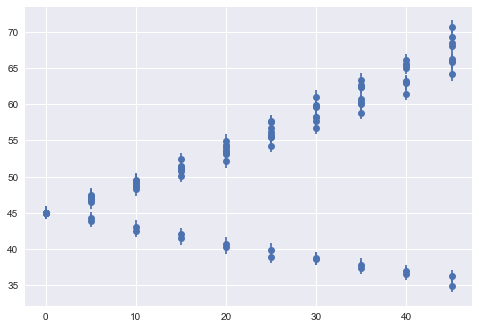

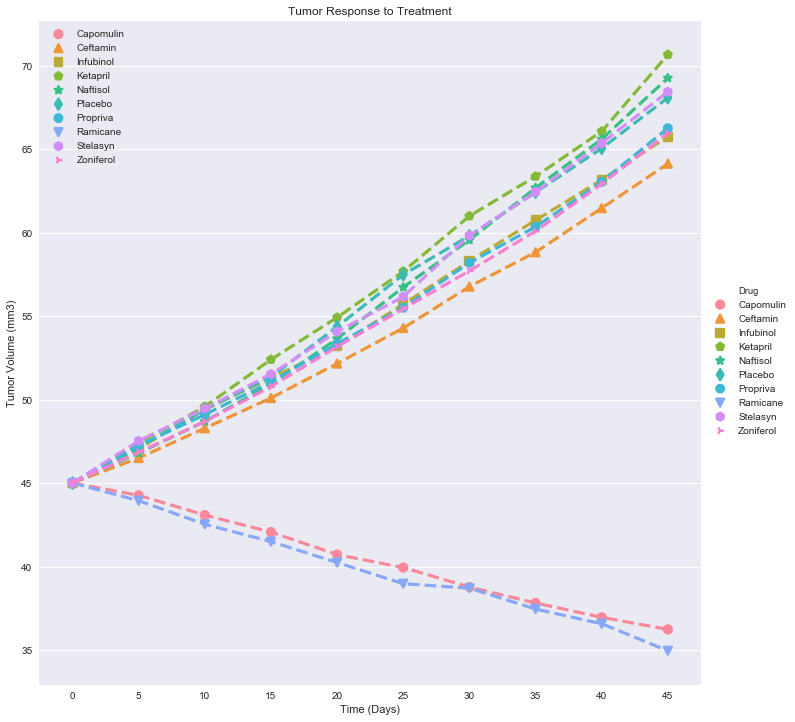

In [138]:
# create a list of markers
markers = ["o", "^", "s", "p", "*", "d", "8", "v", "h", "4"]
fig, ax1= plt.subplots()
# plot the tumor response to treatment
fig = sns.factorplot(x = "Timepoint", y="vals", hue='Drug', data = t_vol_reorder, legend = True, fit_reg = True, markers = markers,
              linestyles = "--", size = 10)


#fig = plt.scatter(t_vol_reorder.Timepoint, t_vol_reorder.vals)
ax1.errorbar(t_vol_reorder.Timepoint, t_vol_reorder.vals, yerr=e, fmt='o')

# create the legends and titles
plt.legend(loc='best')
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.show()

In [140]:
# Limit the data based on metastatic points
ms_df = combined[["Timepoint", "Drug", "Metastatic Sites"]]

# create a group by drug and timepoint
ms_grp = ms_df.groupby(["Drug", "Timepoint"])

# create a volume for data framing
ms = ms_grp["Metastatic Sites"].mean()

# create the data frame for reorginzing
ms_df = pd.DataFrame({"Metastatic Sites": ms})

e = ms_df["Metastatic Sites"].sem()
# reorder the data frame so the drugs are the columns, and the time point is the rows
ms_reorder = ms_df.pivot_table('Metastatic Sites', 'Timepoint', 'Drug')
ms_reorder.columns.name = None

# reset order and melt so that the columns can be used in the plot
ms_reorder = ms_reorder.reset_index()
ms_reorder = ms_reorder.melt('Timepoint', var_name='Drug',  value_name='vals')
ms_reorder.head()

,Timepoint,Drug,vals
0,0,Capomulin,0.000000
1,5,Capomulin,0.160000
2,10,Capomulin,0.320000
3,15,Capomulin,0.375000
4,20,Capomulin,0.652174


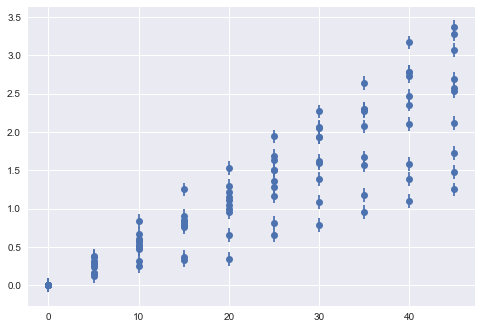

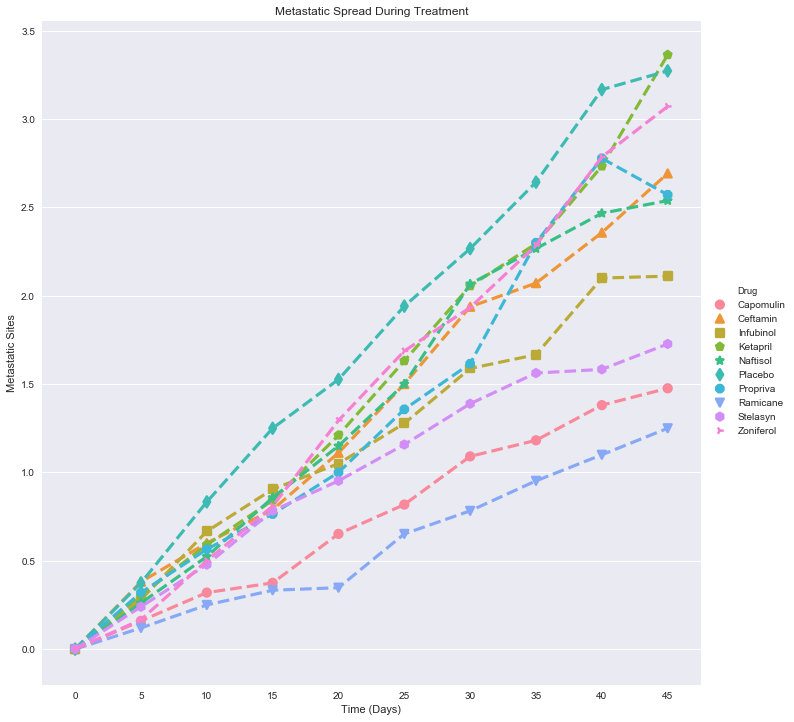

In [141]:
# create a list of markers
markers = ["o", "^", "s", "p", "*", "d", "8", "v", "h", "4"]

fig, ax1= plt.subplots()
# plot the tumor response to treatment
fig = sns.factorplot(x = "Timepoint", y="vals", hue='Drug', data = ms_reorder, legend = True, fit_reg = False, markers = markers,
              linestyles = "--", size = 10)
ax1.errorbar(ms_reorder.Timepoint, ms_reorder.vals, yerr=e, fmt='o')
# create the legends and titles
#plt.legend(loc='best')
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.title("Metastatic Spread During Treatment")

plt.show()

In [142]:
# group by drug and time point
live_grp = combined.groupby(["Drug", "Timepoint"])

# count live mice
start_mice = live_grp["Mouse ID"].count()
live_mice = (live_grp["Mouse ID"].count()/start_mice[0])* 100

# create a dataframe for live mice
live_df = pd.DataFrame({"Live Mice": live_mice})
e = live_df["Live Mice"].sem()
# reorder the data frame so the drugs are the columns, and the time point is the rows
live_reorder = live_df.pivot_table('Live Mice', 'Timepoint', 'Drug')
live_reorder.columns.name = None

# reset order and melt so that the columns can be used in the plot
live_reorder = live_reorder.reset_index()
live_reorder = live_reorder.melt('Timepoint', var_name='Drug',  value_name='vals')
live_reorder.head()

,Timepoint,Drug,vals
0,0,Capomulin,100.0
1,5,Capomulin,100.0
2,10,Capomulin,100.0
3,15,Capomulin,96.0
4,20,Capomulin,92.0


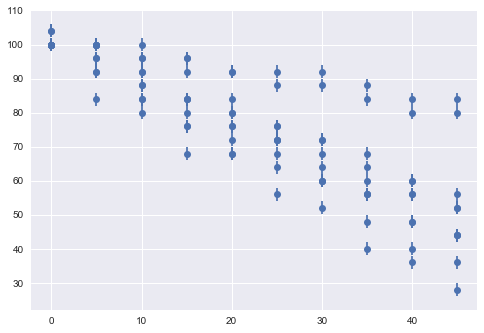

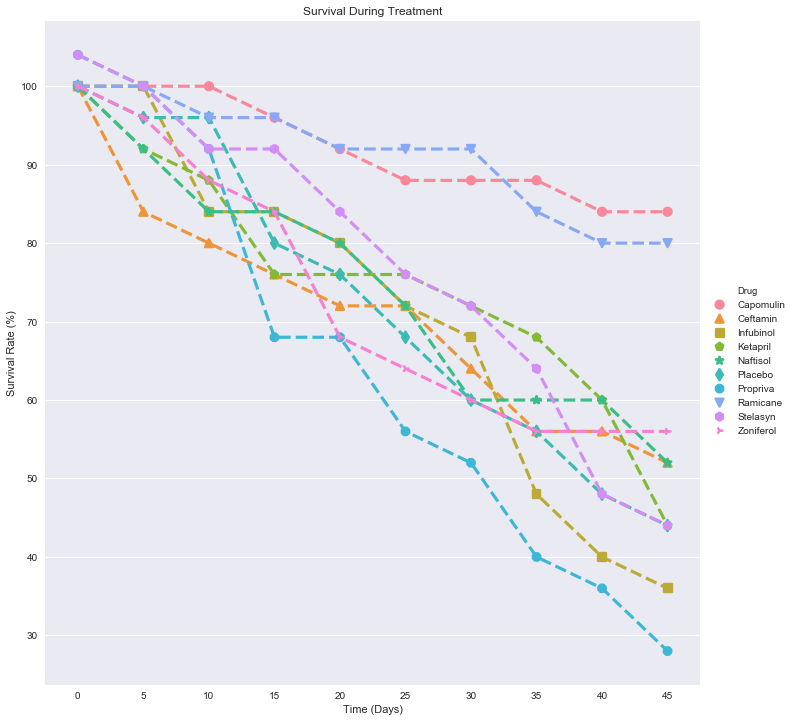

In [143]:
# create a list of markers
markers = ["o", "^", "s", "p", "*", "d", "8", "v", "h", "4"]

fig, ax1= plt.subplots()
# plot the tumor response to treatment
sns.factorplot(x = "Timepoint", y="vals", hue='Drug', data = live_reorder, legend = True, fit_reg = False, markers = markers,
              linestyles = "--", size = 10)

ax1.errorbar(live_reorder.Timepoint, live_reorder.vals, yerr=e, fmt='o')
# create the legends and titles
#plt.legend(loc='best')
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")

plt.show()

In [11]:
pct_clean = t_vol_reorder.loc[(t_vol_reorder["Timepoint"] == 0) | (t_vol_reorder["Timepoint"] == 45), :]


pct_clean['pct_ch'] = pct_clean.groupby('Drug')['vals'].pct_change()*100

pct_clean_chart = pct_clean.loc[pct_clean["Timepoint"] == 45, :]

pct_clean_chart['positive'] = pct_clean_chart['pct_ch'] > 0


C:\Users\nblas\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\nblas\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


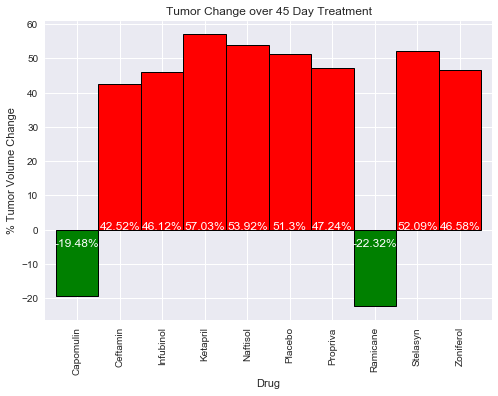

In [144]:
pct_ch = pct_clean_chart.plot(kind='bar', x = "Drug", y = "pct_ch", stacked=True, edgecolor = "black",
                              linewidth = 1, width=1,color=pct_clean_chart.positive.map({True: 'r', False: 'g'}))
pct_ch.legend_ = None

y = round(pct_clean_chart.pct_ch, 2)
x = range(0,len(pct_clean_chart.Drug))
for a, b in zip(y, x):
    if a > 0:
        plt.text(b, 0, str(a) + "%", ha = "center", color = "white")
    else:
        plt.text(b, -5, str(a) + "%", ha = "center", color = "white")

plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change over 45 Day Treatment")
        
plt.show()